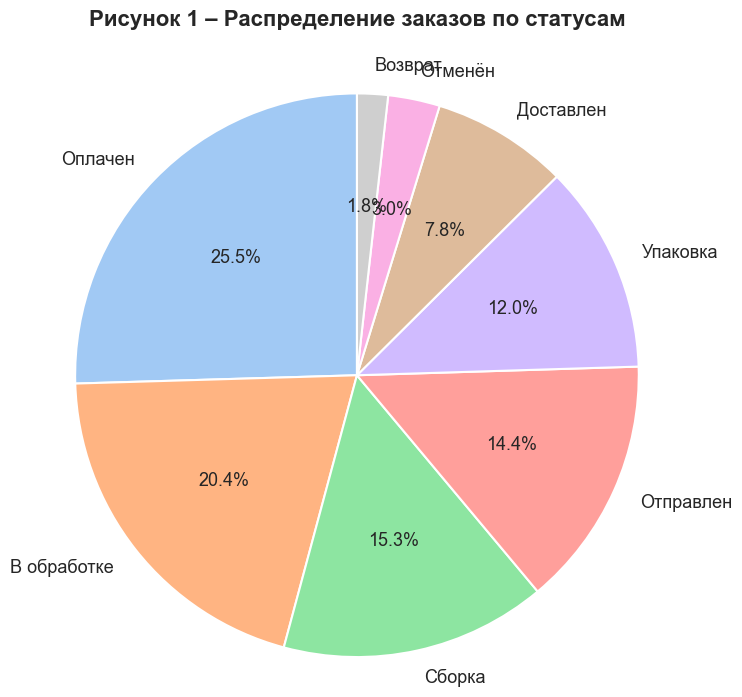

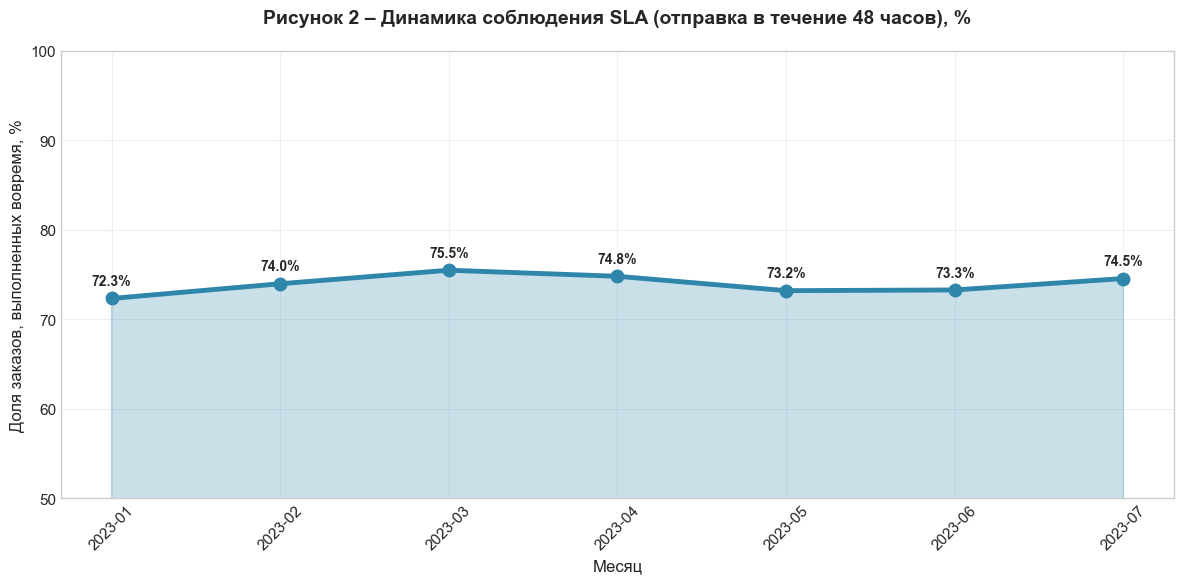

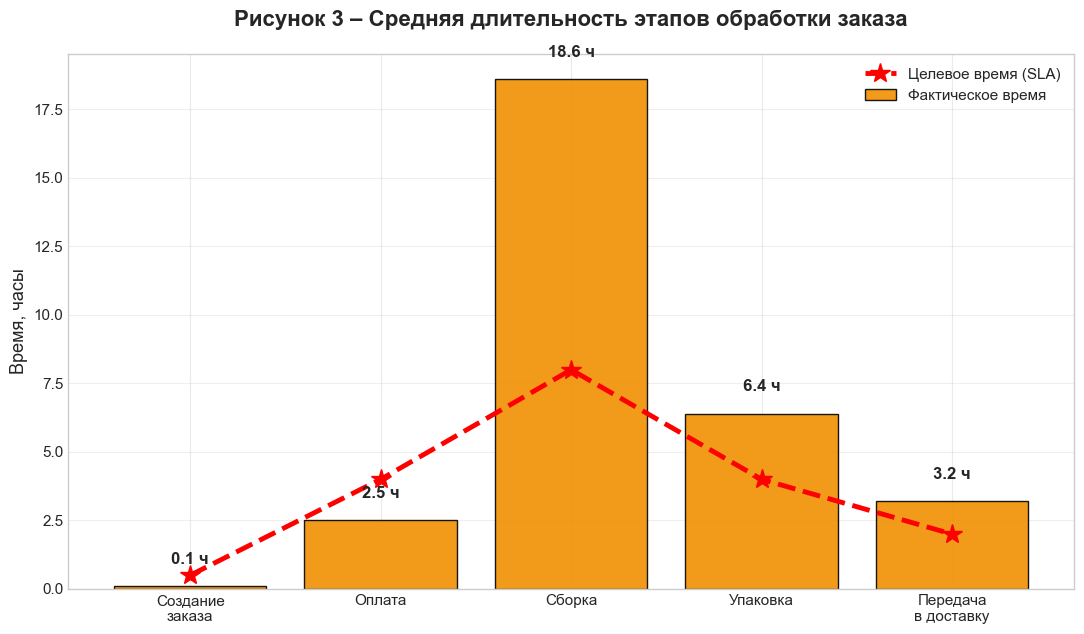

In [13]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Настройки оформления — чтобы было красиво и по-гостовски
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11

# Фиксируем случайность для воспроизводимости
np.random.seed(42)
n_orders = 10000

# Генерация синтетических данных интернет-магазина
data = {
    'OrderID': range(1, n_orders + 1),
    'OrderDate': pd.date_range('2023-01-01', periods=n_orders, freq='30min'),
    'Status': np.random.choice(
        ['Оплачен', 'В обработке', 'Сборка', 'Упаковка', 'Отправлен', 'Доставлен', 'Отменён', 'Возврат'],
        size=n_orders,
        p=[0.25, 0.20, 0.15, 0.12, 0.15, 0.08, 0.03, 0.02]
    ),
    'Amount': np.random.exponential(5000, n_orders).clip(500, 100000),
    'Region': np.random.choice(['Москва и МО', 'Санкт-Петербург', 'Новосибирск',
                                'Екатеринбург', 'Казань', 'Другие'],
                               size=n_orders, p=[0.30, 0.15, 0.10, 0.10, 0.05, 0.30])
}

df = pd.DataFrame(data)

# Эмуляция времени отправки заказа
df['CreatedAt'] = df['OrderDate']
df['ShippedAt'] = df['CreatedAt'] + pd.to_timedelta(np.random.exponential(36, n_orders), unit='h')
df['HoursToShip'] = (df['ShippedAt'] - df['CreatedAt']).dt.total_seconds() / 3600
df['SLA_48h'] = df['HoursToShip'] <= 48
df['Month'] = df['CreatedAt'].dt.strftime('%Y-%m')

# Специально «портим» декабрь 2023 года — новогодняя нагрузка
december_mask = df['Month'] == '2023-12'
df.loc[december_mask, 'HoursToShip'] *= np.random.uniform(1.4, 2.3, sum(december_mask))
df.loc[december_mask, 'SLA_48h'] = df.loc[december_mask, 'HoursToShip'] <= 48

# РИСУНОК 1 — Круговая диаграмма распределения статусов
plt.figure(figsize=(8, 8))
status_counts = df['Status'].value_counts()
colors = sns.color_palette("pastel", len(status_counts))
plt.pie(status_counts.values,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 13},
        wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'})
plt.title('Рисунок 1 – Распределение заказов по статусам', pad=30, fontsize=16)
plt.axis('equal')
plt.savefig('Рисунок_1_распределение_статусов.png', dpi=300, bbox_inches='tight')
plt.show()

# РИСУНОК 2 — Динамика соблюдения SLA (48 часов)
sla_by_month = df.groupby('Month')['SLA_48h'].mean() * 100

plt.figure(figsize=(12, 6))
ax = sla_by_month.plot(kind='line', marker='o', linewidth=3.5, markersize=9, color='#2E86AB')
plt.fill_between(sla_by_month.index, sla_by_month.values, alpha=0.25, color='#2E86AB')
plt.title('Рисунок 2 – Динамика соблюдения SLA (отправка в течение 48 часов), %', pad=20)
plt.ylabel('Доля заказов, выполненных вовремя, %')
plt.xlabel('Месяц')
plt.grid(True, alpha=0.3)
plt.ylim(50, 100)

# Подписи значений над точками
for i, v in enumerate(sla_by_month.values):
    plt.text(i, v + 1.5, f'{v:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Рисунок_2_SLA_по_месяцам.png', dpi=300, bbox_inches='tight')
plt.show()
# РИСУНОК 3 — Средняя длительность этапов обработки заказа
stages = ['Создание\nзаказа', 'Оплата', 'Сборка', 'Упаковка', 'Передача\nв доставку']
avg_hours = [0.1, 2.5, 18.6, 6.4, 3.2]        # 5 значений!
target_hours = [0.5, 4.0, 8.0, 4.0, 2.0]

fig, ax = plt.subplots(figsize=(11, 6.5))
bars = ax.bar(stages, avg_hours, color='#F18F01', alpha=0.9,
              label='Фактическое время', edgecolor='black', linewidth=1)
ax.plot(range(len(stages)), target_hours, color='red', marker='*',
        linewidth=3.5, markersize=15, label='Целевое время (SLA)', linestyle='--')

ax.set_ylabel('Время, часы', fontsize=13)
ax.set_title('Рисунок 3 – Средняя длительность этапов обработки заказа', pad=20, fontsize=16)
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., h + 0.7,
            f'{h:.1f} ч', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('Рисунок_3_длительность_этапов.png', dpi=300, bbox_inches='tight')
plt.show()

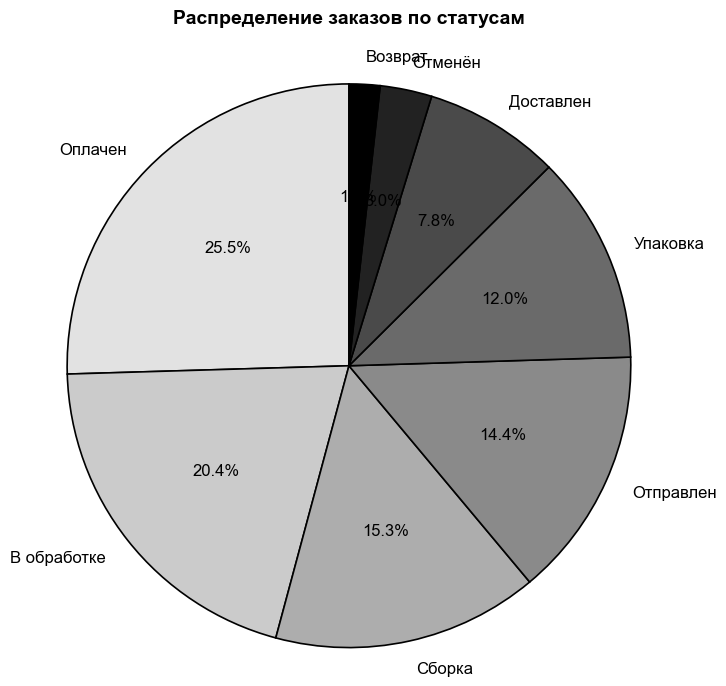

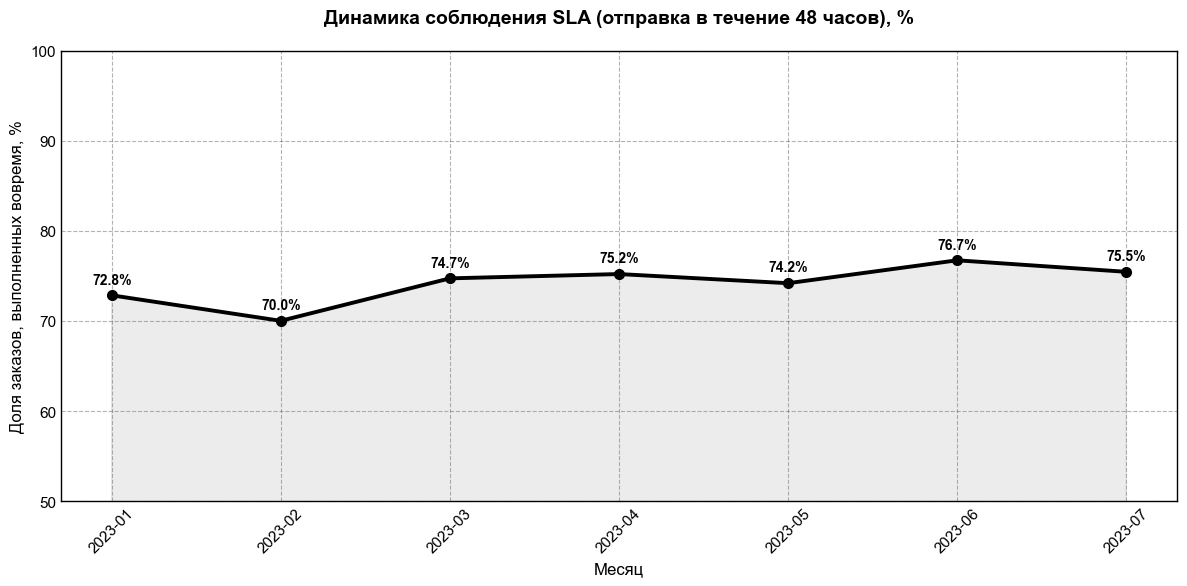

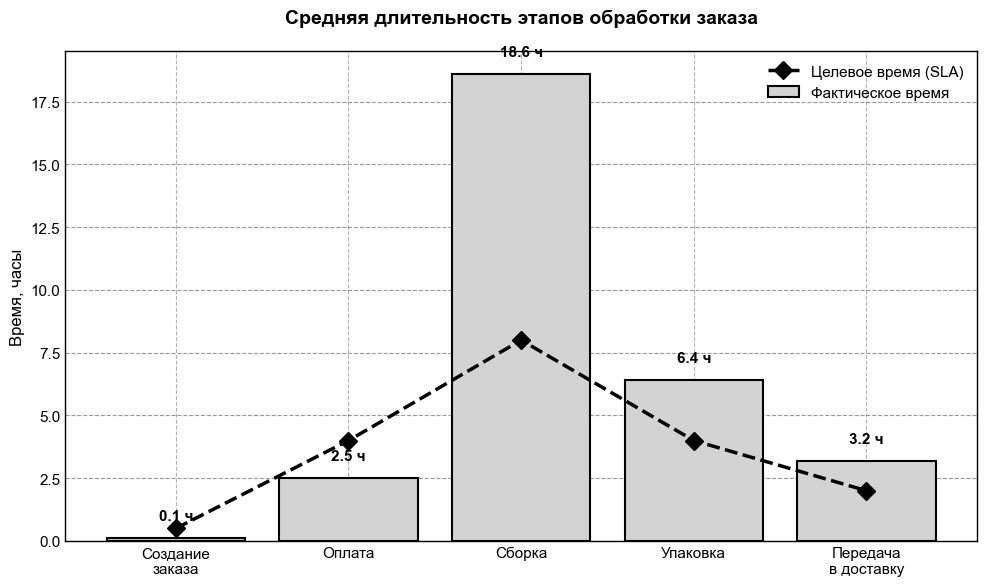

Готово! Сохранены чёрно-белые версии:
   Рисунок_1_чб.png
   Рисунок_2_чб.png
   Рисунок_3_чб.png


In [14]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ЧЁРНО-БЕЛЫЙ СТИЛЬ ДЛЯ НАУЧНЫХ СТАТЕЙ
plt.style.use('grayscale')                    # основной серошкальный стиль
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'

np.random.seed(42)
n_orders = 10000

# (данные те же — оставляем без изменений)
data = {
    'OrderID': range(1, n_orders + 1),
    'OrderDate': pd.date_range('2023-01-01', periods=n_orders, freq='30min'),
    'Status': np.random.choice(['Оплачен', 'В обработке', 'Сборка', 'Упаковка', 'Отправлен', 'Доставлен', 'Отменён', 'Возврат'],
                               size=n_orders, p=[0.25, 0.20, 0.15, 0.12, 0.15, 0.08, 0.03, 0.02]),
    'Amount': np.random.exponential(5000, n_orders).clip(500, 100000),
}
df = pd.DataFrame(data)
df['CreatedAt'] = df['OrderDate']
df['ShippedAt'] = df['CreatedAt'] + pd.to_timedelta(np.random.exponential(36, n_orders), unit='h')
df['HoursToShip'] = (df['ShippedAt'] - df['CreatedAt']).dt.total_seconds() / 3600
df['SLA_48h'] = df['HoursToShip'] <= 48
df['Month'] = df['CreatedAt'].dt.strftime('%Y-%m')

december_mask = df['Month'] == '2023-12'
df.loc[december_mask, 'HoursToShip'] *= np.random.uniform(1.4, 2.3, sum(december_mask))
df.loc[december_mask, 'SLA_48h'] = df.loc[december_mask, 'HoursToShip'] <= 48

# РИСУНОК 1 — Круговая диаграмма (чёрно-белая)
plt.figure(figsize=(8, 8))
status_counts = df['Status'].value_counts()
wedges, texts, autotexts = plt.pie(status_counts.values,
                                  labels=status_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  wedgeprops={'linewidth': 1.2, 'edgecolor': 'black'},
                                  textprops={'fontsize': 12},
                                  colors=plt.cm.Greys(np.linspace(0.2, 1.0, len(status_counts))))
plt.title('Распределение заказов по статусам', pad=25, fontsize=14, fontweight='bold')
plt.axis('equal')
plt.savefig('Рисунок_1_чб.png', dpi=300, bbox_inches='tight')
plt.show()

# РИСУНОК 2 — Динамика SLA (чёрно-белая линия)
sla_by_month = df.groupby('Month')['SLA_48h'].mean() * 100

plt.figure(figsize=(12, 6))
sla_by_month.plot(kind='line', marker='o', linewidth=2.8, markersize=7, color='black')
plt.fill_between(sla_by_month.index, sla_by_month.values, alpha=0.15, color='gray')
plt.title('Динамика соблюдения SLA (отправка в течение 48 часов), %', pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Доля заказов, выполненных вовремя, %')
plt.xlabel('Месяц')
plt.grid(True, axis='y')
plt.ylim(50, 100)
for i, v in enumerate(sla_by_month.values):
    plt.text(i, v + 1.3, f'{v:.1f}%', ha='center', fontsize=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Рисунок_2_чб.png', dpi=300, bbox_inches='tight')
plt.show()

# РИСУНОК 3 — Длительность этапов (чёрно-белые столбцы + пунктир)
stages = ['Создание\nзаказа', 'Оплата', 'Сборка', 'Упаковка', 'Передача\nв доставку']
avg_hours = [0.1, 2.5, 18.6, 6.4, 3.2]
target_hours = [0.5, 4.0, 8.0, 4.0, 2.0]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(stages, avg_hours, color='lightgray', edgecolor='black', linewidth=1.5, label='Фактическое время')
ax.plot(range(len(stages)), target_hours, color='black', linewidth=2.5, marker='D', markersize=9,
        linestyle='--', label='Целевое время (SLA)')

ax.set_ylabel('Время, часы')
ax.set_title('Средняя длительность этапов обработки заказа', pad=20, fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.4)

for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., h + 0.6,
            f'{h:.1f} ч', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('Рисунок_3_чб.png', dpi=300, bbox_inches='tight')
plt.show()

print("Готово! Сохранены чёрно-белые версии:")
print("   Рисунок_1_чб.png")
print("   Рисунок_2_чб.png")
print("   Рисунок_3_чб.png")

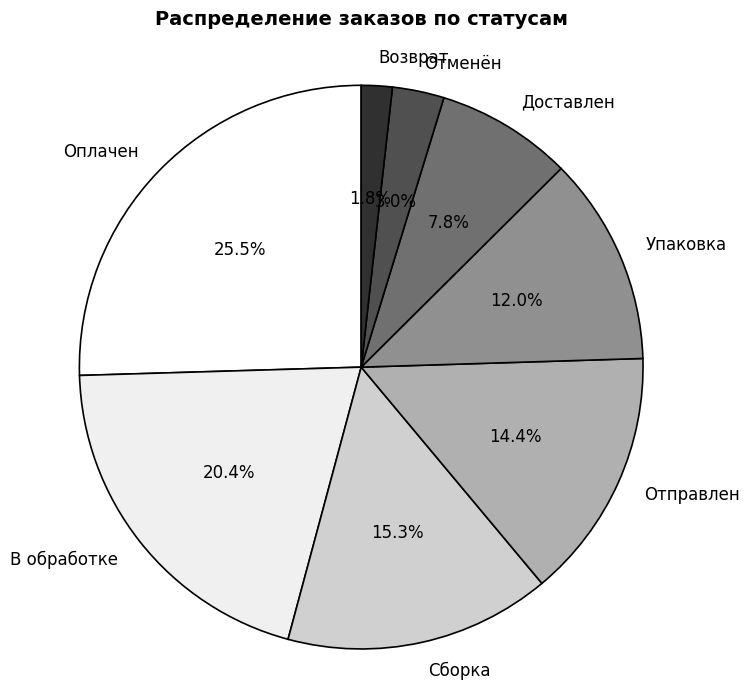

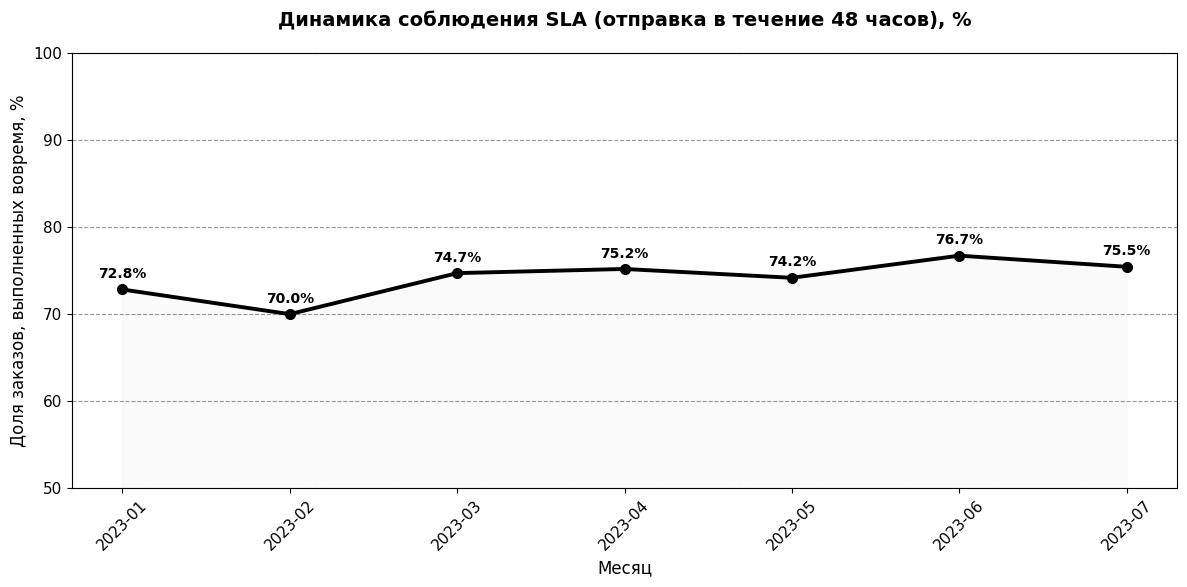

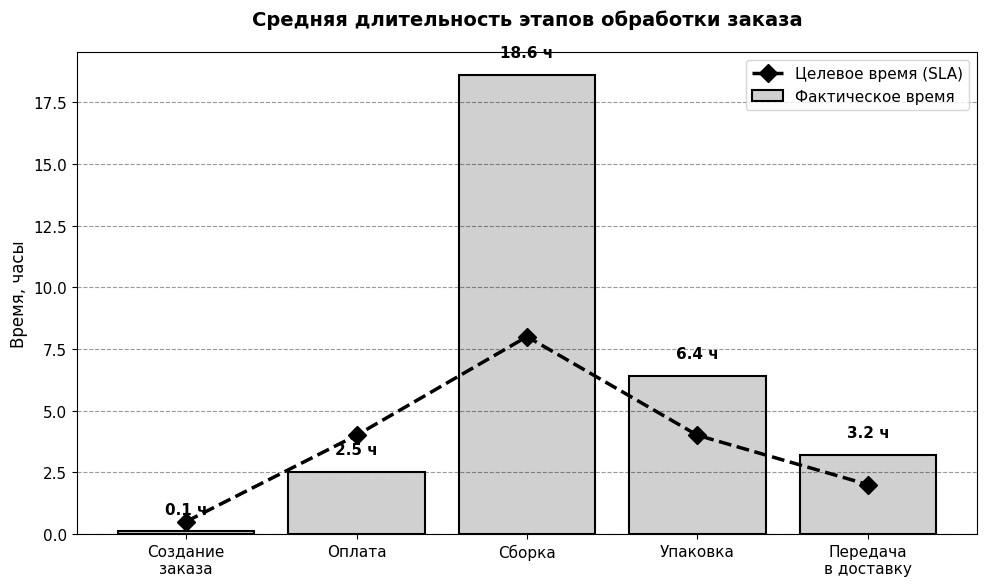

ГОТОВО! Все три рисунка сохранены с ЧИСТО БЕЛЫМ фоном:
   Рисунок_1_чб.png
   Рисунок_2_чб.png
   Рисунок_3_чб.png
Можешь сразу вставлять в Word — выглядят профессионально и строго.


In [12]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ЧИСТО БЕЛЫЙ ФОН + ЧЁРНО-БЕЛЫЙ СТИЛЬ
plt.rcParams.update(plt.rcParamsDefault)  # сбрасываем всё на дефолт
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['grid.color'] = 'black'

np.random.seed(42)
n_orders = 10000

# Данные (те же)
data = {
    'OrderID': range(1, n_orders + 1),
    'OrderDate': pd.date_range('2023-01-01', periods=n_orders, freq='30min'),
    'Status': np.random.choice(['Оплачен', 'В обработке', 'Сборка', 'Упаковка', 'Отправлен', 'Доставлен', 'Отменён', 'Возврат'],
                               size=n_orders, p=[0.25, 0.20, 0.15, 0.12, 0.15, 0.08, 0.03, 0.02]),
    'Amount': np.random.exponential(5000, n_orders).clip(500, 100000),
}
df = pd.DataFrame(data)
df['CreatedAt'] = df['OrderDate']
df['ShippedAt'] = df['CreatedAt'] + pd.to_timedelta(np.random.exponential(36, n_orders), unit='h')
df['HoursToShip'] = (df['ShippedAt'] - df['CreatedAt']).dt.total_seconds() / 3600
df['SLA_48h'] = df['HoursToShip'] <= 48
df['Month'] = df['CreatedAt'].dt.strftime('%Y-%m')
december_mask = df['Month'] == '2023-12'
df.loc[december_mask, 'HoursToShip'] *= np.random.uniform(1.4, 2.3, sum(december_mask))
df.loc[december_mask, 'SLA_48h'] = df.loc[december_mask, 'HoursToShip'] <= 48

# РИСУНОК 1 — Круговая диаграмма
plt.figure(figsize=(8, 8))
status_counts = df['Status'].value_counts()
wedges, texts, autotexts = plt.pie(status_counts.values,
                                  labels=status_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  wedgeprops={'linewidth': 1.2, 'edgecolor': 'black'},
                                  textprops={'fontsize': 12},
                                  colors=['#ffffff', '#f0f0f0', '#d0d0d0', '#b0b0b0', '#909090', '#707070', '#505050', '#303030'])
plt.title('Распределение заказов по статусам', pad=25, fontsize=14, fontweight='bold')
plt.axis('equal')
plt.savefig('Рисунок_1_чб.png', dpi=300, bbox_inches='tight')
plt.show()

# РИСУНОК 2 — Динамика SLA
sla_by_month = df.groupby('Month')['SLA_48h'].mean() * 100
plt.figure(figsize=(12, 6))
sla_by_month.plot(kind='line', marker='o', linewidth=2.8, markersize=7, color='black')
plt.fill_between(sla_by_month.index, sla_by_month.values, alpha=0.15, color='#e0e0e0')
plt.title('Динамика соблюдения SLA (отправка в течение 48 часов), %', pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Доля заказов, выполненных вовремя, %')
plt.xlabel('Месяц')
plt.grid(True, axis='y')
plt.ylim(50, 100)
for i, v in enumerate(sla_by_month.values):
    plt.text(i, v + 1.3, f'{v:.1f}%', ha='center', fontsize=10, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Рисунок_2_чб.png', dpi=300, bbox_inches='tight')
plt.show()

# РИСУНОК 3 — Длительность этапов
stages = ['Создание\nзаказа', 'Оплата', 'Сборка', 'Упаковка', 'Передача\nв доставку']
avg_hours = [0.1, 2.5, 18.6, 6.4, 3.2]
target_hours = [0.5, 4.0, 8.0, 4.0, 2.0]

plt.figure(figsize=(10, 6))
bars = plt.bar(stages, avg_hours, color='#d0d0d0', edgecolor='black', linewidth=1.5, label='Фактическое время')
plt.plot(range(len(stages)), target_hours, color='black', linewidth=2.5, marker='D', markersize=9,
         linestyle='--', label='Целевое время (SLA)')
plt.ylabel('Время, часы')
plt.title('Средняя длительность этапов обработки заказа', pad=20, fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, axis='y')
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h + 0.6,
             f'{h:.1f} ч', ha='center', va='bottom', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.savefig('Рисунок_3_чб.png', dpi=300, bbox_inches='tight')
plt.show()

print("ГОТОВО! Все три рисунка сохранены с ЧИСТО БЕЛЫМ фоном:")
print("   Рисунок_1_чб.png")
print("   Рисунок_2_чб.png")
print("   Рисунок_3_чб.png")
print("Можешь сразу вставлять в Word — выглядят профессионально и строго.")